In [367]:
# imports
from etsy2 import Etsy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import scipy.stats as stats

%matplotlib inline
plt.style.use('ggplot')

# try to make presentation as cohesive as possible

In [521]:
# accessing Etsy's API
etsy = Etsy(api_key='h3sb155lstj9j1pztllhyuzt')

# Getting Listings Data #

In [575]:
# only returns max 12100 at a time

active_list = []
for i in range(0,50000,100):
    lst = etsy.findAllListingActive(limit = 100, offset = i)
    active_list += lst
    
len(active_list)

12100

In [320]:
# convert to dataframe
active_df = pd.DataFrame(active_list)
active_df.head()

In [578]:
# save to csv

# active_df.to_csv('activedf.csv')
# active_df.to_csv('active2.csv')
# active_df.to_csv('active3.csv')
# active_df.to_csv('active4.csv')
# active_df.to_csv('active5.csv')
# active_df.to_csv('active6.csv')
# active_df.to_csv('active7.csv')
# active_df.to_csv('active8.csv')
# active_df.to_csv('active9.csv')
# active_df.to_csv('active10.csv')

In [369]:
# read in all dataframes

active1 = pd.read_csv('activedf.csv')
active2 = pd.read_csv('active2.csv')
active3 = pd.read_csv('active3.csv')
active4 = pd.read_csv('active4.csv')
active5 = pd.read_csv('active5.csv')
active6 = pd.read_csv('active6.csv')
active7 = pd.read_csv('active7.csv')
active8 = pd.read_csv('active8.csv')
active9 = pd.read_csv('active9.csv')
active10 = pd.read_csv('active10.csv')

In [370]:
# combine dataframes, dropping duplicate listings

df = pd.concat([active1, active2, active3, active4, active5, active6, active7, active8, active9, active10]).drop_duplicates('listing_id')
df.shape

(61285, 51)

In [371]:
# drop first column of duplicate indexes

df = df.drop(['Unnamed: 0'], axis = 1)
df.shape

(61285, 50)

In [401]:
# keep wanted columns
keep = ['listing_id','user_id', 'title','description','creation_tsz','original_creation_tsz', 'last_modified_tsz','price','tags','views','num_favorers','is_customizable','taxonomy_path']
listings = df[keep]

In [403]:
# save this dataset
listings.to_csv('listings.csv')

In [404]:
# import in dataset
listings = pd.read_csv('listings.csv')

# Data Cleaning #

In [405]:
# drop duplicate column
listings = listings.drop(['Unnamed: 0'], axis = 1)
listings.shape

(61285, 13)

In [406]:
# drop listings where views and num_favorers have null values
# 54 rows
listings = listings[listings['views'].notnull()]
listings = listings[listings['num_favorers'].notnull()]
listings.shape

(61231, 13)

## Feature Engineering ##

### Create Column for Product Categories ###

In [407]:
# convert taxonomy_path column from string to list
listings['taxonomy_path_new'] = listings['taxonomy_path'].str.strip('[]').str.replace("'", "").str.split(',')
listings.shape
# drop old column
#listings = listings.drop(['taxonomy_path'], axis=1)

(61231, 14)

In [408]:
# create new column for first level product category, taking first item in taxonomy_path_new
listings['product_category'] = listings['taxonomy_path_new'].str[0]

In [409]:
listings.head()

,listing_id,user_id,title,description,creation_tsz,original_creation_tsz,last_modified_tsz,price,tags,views,num_favorers,is_customizable,taxonomy_path,taxonomy_path_new,product_category
0,953575418,9704897.0,New Stainless Steel 304 Clasp For 5.5mm - 6mm ...,This listing is for one (1) stainless steel cl...,1.614075e+09,1.613965e+09,1.614075e+09,3.75,"['round cord clasp', 'round leather clasp', 'l...",0.0,0.0,True,"['Craft Supplies & Tools', 'Findings', 'Clasps...","[Craft Supplies & Tools, Findings, Clasps & ...",Craft Supplies & Tools
1,844913736,343332809.0,Personalised 30th Birthday Non Shed Glitter Ca...,Personalised 30th Birthday Non Shed Glitter Ca...,1.614075e+09,1.598100e+09,1.614075e+09,4.00,"['gold glitter', 'birthday topper', 'glitter t...",2326.0,77.0,False,"['Craft Supplies & Tools', 'Kitchen Supplies',...","[Craft Supplies & Tools, Kitchen Supplies, B...",Craft Supplies & Tools
2,575201380,124528788.0,Personalised Wedding Day Slippers for Bridesma...,Beautiful personalised wedding slippers perfec...,1.614075e+09,1.516874e+09,1.614075e+09,3.00,"['Hen Party', 'bridesmaid gifts', 'hen party s...",62398.0,4518.0,False,"['Weddings', 'Gifts & Mementos', ""Bridesmaids'...","[Weddings, Gifts & Mementos, ""Bridesmaids Gi...",Weddings
3,965856311,9704897.0,Style Variety Mix - 5 Piece Pre-Cut - 6 - 6 3/...,This listing is for 5 precut 6 - 6 3/4 inch st...,1.614075e+09,1.613724e+09,1.614075e+09,7.50,"['Greek Leather', 'Leather Cord', 'Genuine Lea...",0.0,0.0,True,"['Craft Supplies & Tools', 'String, Cord & Wire']","[Craft Supplies & Tools, String, Cord & Wire]",Craft Supplies & Tools
4,964511173,9704897.0,Overstock / Clearance - Variety Mix Packs - Za...,This listing is for FIFTEEN Pieces (15) Zamak ...,1.614075e+09,1.613550e+09,1.614075e+09,7.25,"['Jewelry Findings', 'Stainless Steel', 'stain...",0.0,0.0,True,"['Craft Supplies & Tools', 'Beads, Gems & Cabo...","[Craft Supplies & Tools, Beads, Gems & Caboc...",Craft Supplies & Tools


In [666]:
## get Seller taxonomy
taxonomy_lst = etsy.getSellerTaxonomy()
#taxonomy_lst[0]

In [238]:
# get the id's and corresponding names of the first level of the Seller taxonomy

def getProductCategories(taxonomy):
    tax_dict = dict()
    
    for dct in taxonomy:
        tax_id = dct['id']
        tax_name = dct['name']
        tax_dict[tax_id] = tax_name
        
    return tax_dict

tax_dict = getProductCategories(taxonomy_lst)
tax_dict

{1: 'Accessories',
 66: 'Art & Collectibles',
 132: 'Bags & Purses',
 199: 'Bath & Beauty',
 323: 'Books, Movies & Music',
 374: 'Clothing',
 562: 'Craft Supplies & Tools',
 825: 'Electronics & Accessories',
 891: 'Home & Living',
 1179: 'Jewelry',
 1250: 'Paper & Party Supplies',
 1351: 'Pet Supplies',
 1429: 'Shoes',
 1552: 'Toys & Games',
 1633: 'Weddings'}

In [410]:
listings['product_category'].value_counts()

Craft Supplies & Tools       13101
Home & Living                11676
Jewelry                       7183
Art & Collectibles            7051
Clothing                      5576
Paper & Party Supplies        4151
Accessories                   3364
Bath & Beauty                 2520
Weddings                      1345
Toys & Games                  1261
Electronics & Accessories     1146
Books                         1064
Bags & Purses                  840
Pet Supplies                   709
Shoes                          244
Name: product_category, dtype: int64

In [386]:
## make barchart of product categories
# get counts of each one, convert to dataframe
counts = pd.DataFrame(listings['product_category'].value_counts())
counts.reset_index()
counts.columns = ['counts']
counts.index.name = 'product category'
counts

,counts
product category,
Craft Supplies & Tools,13101
Home & Living,11676
Jewelry,7183
Art & Collectibles,7051
Clothing,5576
Paper & Party Supplies,4151
Accessories,3364
Bath & Beauty,2520
Weddings,1345


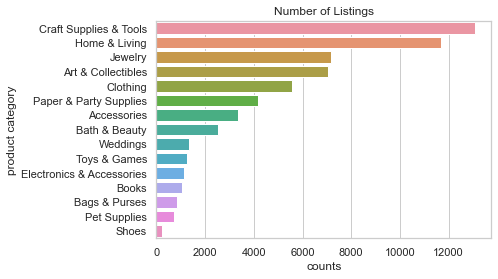

In [387]:
sns.set_theme(style="whitegrid")
ax = sns.barplot(x=counts.counts, y=counts.index, data=counts)
ax.set_title("Number of Listings")
#plt.show()
plt.savefig('product categories', bbox_inches='tight')

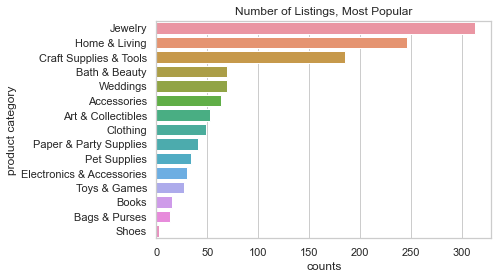

In [695]:
# edit code for regular, popular, and most popular

# get counts of each one, convert to dataframe
counts2 = pd.DataFrame(bigoutlier_faves['product_category'].value_counts())
counts2.reset_index()
counts2.columns = ['counts']
counts2.index.name = 'product category'
counts2

sns.set_theme(style="whitegrid")
ax = sns.barplot(x=counts2.counts, y=counts2.index, data=counts2)
ax.set_title("Number of Listings, Most Popular")
#plt.show()
plt.savefig('product categories mostpop', bbox_inches='tight')

### Creating columns for quantitative text features ###

In [411]:
# title, description, tag columns
listings['title_count'] = listings['title'].str.split().str.len()
listings['desc_count'] = listings['description'].str.split().str.len()
listings['tag_count'] = listings['tags'].str.strip('[]').str.replace("'", "").str.split(',').str.len()
listings.shape

(61231, 18)

### Creating columns for number of days since each timestamp ### 

In [412]:
# creation_tsz, original_creation_tsz, last_modified_tsz columns

# convert to datetime
convert = lambda x: dt.datetime.fromtimestamp(x)
listings['col1'] = listings['creation_tsz'].apply(convert)
listings['col2'] = listings['original_creation_tsz'].apply(convert)
listings['col3'] = listings['last_modified_tsz'].apply(convert)
print(listings.shape)

(61231, 21)


,listing_id,user_id,title,description,creation_tsz,original_creation_tsz,last_modified_tsz,price,tags,views,...,is_customizable,taxonomy_path,taxonomy_path_new,product_category,title_count,desc_count,tag_count,col1,col2,col3
0,953575418,9704897.0,New Stainless Steel 304 Clasp For 5.5mm - 6mm ...,This listing is for one (1) stainless steel cl...,1.614075e+09,1.613965e+09,1.614075e+09,3.75,"['round cord clasp', 'round leather clasp', 'l...",0.0,...,True,"['Craft Supplies & Tools', 'Findings', 'Clasps...","[Craft Supplies & Tools, Findings, Clasps & ...",Craft Supplies & Tools,21,124,13,2021-02-23 02:11:03,2021-02-21 19:31:56,2021-02-23 02:11:04
1,844913736,343332809.0,Personalised 30th Birthday Non Shed Glitter Ca...,Personalised 30th Birthday Non Shed Glitter Ca...,1.614075e+09,1.598100e+09,1.614075e+09,4.00,"['gold glitter', 'birthday topper', 'glitter t...",2326.0,...,False,"['Craft Supplies & Tools', 'Kitchen Supplies',...","[Craft Supplies & Tools, Kitchen Supplies, B...",Craft Supplies & Tools,20,185,11,2021-02-23 02:10:57,2020-08-22 05:33:47,2021-02-23 02:10:57
2,575201380,124528788.0,Personalised Wedding Day Slippers for Bridesma...,Beautiful personalised wedding slippers perfec...,1.614075e+09,1.516874e+09,1.614075e+09,3.00,"['Hen Party', 'bridesmaid gifts', 'hen party s...",62398.0,...,False,"['Weddings', 'Gifts & Mementos', ""Bridesmaids'...","[Weddings, Gifts & Mementos, ""Bridesmaids Gi...",Weddings,12,268,13,2021-02-23 02:10:56,2018-01-25 01:59:36,2021-02-23 02:10:56
3,965856311,9704897.0,Style Variety Mix - 5 Piece Pre-Cut - 6 - 6 3/...,This listing is for 5 precut 6 - 6 3/4 inch st...,1.614075e+09,1.613724e+09,1.614075e+09,7.50,"['Greek Leather', 'Leather Cord', 'Genuine Lea...",0.0,...,True,"['Craft Supplies & Tools', 'String, Cord & Wire']","[Craft Supplies & Tools, String, Cord & Wire]",Craft Supplies & Tools,23,148,13,2021-02-23 02:10:56,2021-02-19 00:39:24,2021-02-23 02:10:56
4,964511173,9704897.0,Overstock / Clearance - Variety Mix Packs - Za...,This listing is for FIFTEEN Pieces (15) Zamak ...,1.614075e+09,1.613550e+09,1.614075e+09,7.25,"['Jewelry Findings', 'Stainless Steel', 'stain...",0.0,...,True,"['Craft Supplies & Tools', 'Beads, Gems & Cabo...","[Craft Supplies & Tools, Beads, Gems & Caboc...",Craft Supplies & Tools,23,152,13,2021-02-23 02:10:56,2021-02-17 00:23:42,2021-02-23 02:10:56


In [413]:
# find difference of days from today

# today = datetime.datetime.now()
today = dt.datetime(2021, 2, 25, 1, 4, 55, 864072)

listings['days_since_creation'] = (today - listings['col1']).dt.days
listings['days_since_og_creation'] = (today - listings['col2']).dt.days
listings['days_since_modified'] = (today - listings['col3']).dt.days

listings.head()

,listing_id,user_id,title,description,creation_tsz,original_creation_tsz,last_modified_tsz,price,tags,views,...,product_category,title_count,desc_count,tag_count,col1,col2,col3,days_since_creation,days_since_og_creation,days_since_modified
0,953575418,9704897.0,New Stainless Steel 304 Clasp For 5.5mm - 6mm ...,This listing is for one (1) stainless steel cl...,1.614075e+09,1.613965e+09,1.614075e+09,3.75,"['round cord clasp', 'round leather clasp', 'l...",0.0,...,Craft Supplies & Tools,21,124,13,2021-02-23 02:11:03,2021-02-21 19:31:56,2021-02-23 02:11:04,1,3,1
1,844913736,343332809.0,Personalised 30th Birthday Non Shed Glitter Ca...,Personalised 30th Birthday Non Shed Glitter Ca...,1.614075e+09,1.598100e+09,1.614075e+09,4.00,"['gold glitter', 'birthday topper', 'glitter t...",2326.0,...,Craft Supplies & Tools,20,185,11,2021-02-23 02:10:57,2020-08-22 05:33:47,2021-02-23 02:10:57,1,186,1
2,575201380,124528788.0,Personalised Wedding Day Slippers for Bridesma...,Beautiful personalised wedding slippers perfec...,1.614075e+09,1.516874e+09,1.614075e+09,3.00,"['Hen Party', 'bridesmaid gifts', 'hen party s...",62398.0,...,Weddings,12,268,13,2021-02-23 02:10:56,2018-01-25 01:59:36,2021-02-23 02:10:56,1,1126,1
3,965856311,9704897.0,Style Variety Mix - 5 Piece Pre-Cut - 6 - 6 3/...,This listing is for 5 precut 6 - 6 3/4 inch st...,1.614075e+09,1.613724e+09,1.614075e+09,7.50,"['Greek Leather', 'Leather Cord', 'Genuine Lea...",0.0,...,Craft Supplies & Tools,23,148,13,2021-02-23 02:10:56,2021-02-19 00:39:24,2021-02-23 02:10:56,1,6,1
4,964511173,9704897.0,Overstock / Clearance - Variety Mix Packs - Za...,This listing is for FIFTEEN Pieces (15) Zamak ...,1.614075e+09,1.613550e+09,1.614075e+09,7.25,"['Jewelry Findings', 'Stainless Steel', 'stain...",0.0,...,Craft Supplies & Tools,23,152,13,2021-02-23 02:10:56,2021-02-17 00:23:42,2021-02-23 02:10:56,1,8,1


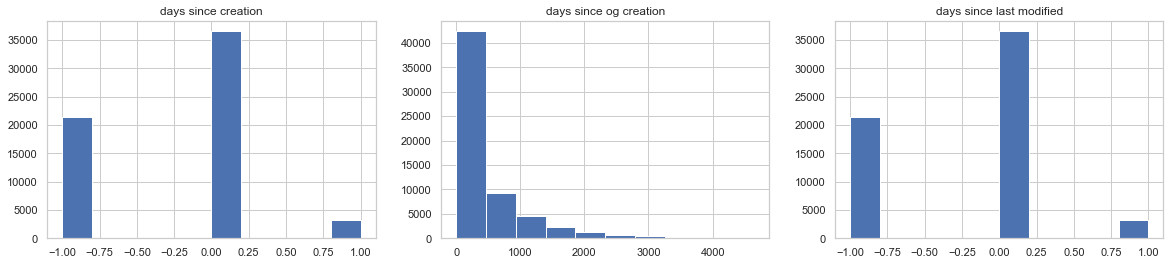

In [391]:
# distribution of new day columns
fig, axes = plt.subplots(1,3, figsize = (20,4))

listings['days_since_creation'].hist(ax = axes[0])
axes[0].set_title('days since creation')
listings['days_since_og_creation'].hist(ax = axes[1])
axes[1].set_title('days since og creation')
listings['days_since_modified'].hist(ax = axes[2])
axes[2].set_title('days since last modified')

plt.show()

# og creation most interesting

### Create column for month of og creation ###

In [414]:
listings['og_creation_month'] = listings['col2'].dt.month

In [92]:
# bar chart of counts

months = pd.DataFrame(listings['og_creation_month'].value_counts())

month_names = {1: 'January', 
               2: 'February', 
               3: 'March', 
               4: 'April', 
               5: 'May', 
               6: 'June', 
               7: 'July', 
               8: 'August', 
               9: 'September', 
               10: 'October',
               11: 'November',
               12: 'December'}

months.reset_index()
months.columns = ['counts']
months.index.name = 'month'
months['month_name']= months.index.map(month_names)
months.sort_values(['month'], ascending=True)

,counts,month_name
month,,
1,5580,January
2,19442,February
3,2277,March
4,2411,April
5,2639,May
6,5026,June
7,3012,July
8,3084,August
9,3201,September


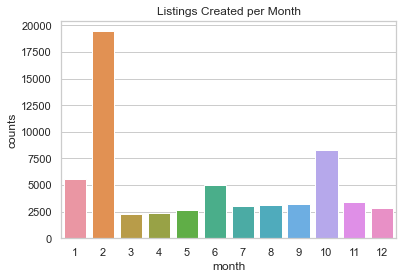

In [149]:
# plot 
sns.set_theme(style="whitegrid")
ax = sns.barplot(x=months.index, y=months.counts, data=months)
ax.set_title("Listings Created per Month")
plt.savefig('listings per months')

In [ ]:
# question: what's the average number of views/faves for posts created in each month?
# 

In [ ]:
## find means of 

In [796]:
# # sanity check

# fig, axes = plt.subplots(1,3, figsize = (20,4))

# listings['col1'].hist(ax = axes[0])
# listings['col2'].hist(ax = axes[1])
# listings['col3'].hist(ax = axes[2])

# plt.show()

In [709]:
# ts_epoch = listings['original_creation_tsz']
# ts = dt.datetime.fromtimestamp(ts_epoch) #.strftime('%Y-%m-%d %H:%M:%S')

### Convert customization column to int ###

In [415]:
listings['is_customizable'] = listings['is_customizable'].astype(int)
listings.groupby(['is_customizable'])['views','num_favorers'].agg(['mean', 'count'])

/Users/kellyz/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


views        num_favorers       
                        mean  count         mean  count
is_customizable                                        
0                2946.648474  49396   221.191291  49396
1                5837.881369  11835   470.682890  11835

In [418]:
# drop unwanted columns
listings = listings.drop(['creation_tsz','last_modified_tsz','taxonomy_path_new','col1','col2','col3','days_since_creation','days_since_modified'], axis=1)

In [432]:
print(listings.shape)
listings.head()

(61231, 17)


,listing_id,user_id,title,description,original_creation_tsz,price,tags,views,num_favorers,is_customizable,taxonomy_path,product_category,title_count,desc_count,tag_count,days_since_og_creation,og_creation_month
0,953575418,9704897.0,New Stainless Steel 304 Clasp For 5.5mm - 6mm ...,This listing is for one (1) stainless steel cl...,1.613965e+09,3.75,"['round cord clasp', 'round leather clasp', 'l...",0.0,0.0,1,"['Craft Supplies & Tools', 'Findings', 'Clasps...",Craft Supplies & Tools,21,124,13,3,2
1,844913736,343332809.0,Personalised 30th Birthday Non Shed Glitter Ca...,Personalised 30th Birthday Non Shed Glitter Ca...,1.598100e+09,4.00,"['gold glitter', 'birthday topper', 'glitter t...",2326.0,77.0,0,"['Craft Supplies & Tools', 'Kitchen Supplies',...",Craft Supplies & Tools,20,185,11,186,8
2,575201380,124528788.0,Personalised Wedding Day Slippers for Bridesma...,Beautiful personalised wedding slippers perfec...,1.516874e+09,3.00,"['Hen Party', 'bridesmaid gifts', 'hen party s...",62398.0,4518.0,0,"['Weddings', 'Gifts & Mementos', ""Bridesmaids'...",Weddings,12,268,13,1126,1
3,965856311,9704897.0,Style Variety Mix - 5 Piece Pre-Cut - 6 - 6 3/...,This listing is for 5 precut 6 - 6 3/4 inch st...,1.613724e+09,7.50,"['Greek Leather', 'Leather Cord', 'Genuine Lea...",0.0,0.0,1,"['Craft Supplies & Tools', 'String, Cord & Wire']",Craft Supplies & Tools,23,148,13,6,2
4,964511173,9704897.0,Overstock / Clearance - Variety Mix Packs - Za...,This listing is for FIFTEEN Pieces (15) Zamak ...,1.613550e+09,7.25,"['Jewelry Findings', 'Stainless Steel', 'stain...",0.0,0.0,1,"['Craft Supplies & Tools', 'Beads, Gems & Cabo...",Craft Supplies & Tools,23,152,13,8,2


In [420]:
# save final dataset to csv
listings.to_csv('data.csv')

In [425]:
# import cleaned dataset
data = pd.read_csv('data.csv')

In [426]:
# drop duplicate column
data = data.drop(['Unnamed: 0'], axis = 1)

In [427]:
data.head()

,listing_id,user_id,title,description,original_creation_tsz,price,tags,views,num_favorers,is_customizable,taxonomy_path,product_category,title_count,desc_count,tag_count,days_since_og_creation,og_creation_month
0,953575418,9704897.0,New Stainless Steel 304 Clasp For 5.5mm - 6mm ...,This listing is for one (1) stainless steel cl...,1.613965e+09,3.75,"['round cord clasp', 'round leather clasp', 'l...",0.0,0.0,1,"['Craft Supplies & Tools', 'Findings', 'Clasps...",Craft Supplies & Tools,21,124,13,3,2
1,844913736,343332809.0,Personalised 30th Birthday Non Shed Glitter Ca...,Personalised 30th Birthday Non Shed Glitter Ca...,1.598100e+09,4.00,"['gold glitter', 'birthday topper', 'glitter t...",2326.0,77.0,0,"['Craft Supplies & Tools', 'Kitchen Supplies',...",Craft Supplies & Tools,20,185,11,186,8
2,575201380,124528788.0,Personalised Wedding Day Slippers for Bridesma...,Beautiful personalised wedding slippers perfec...,1.516874e+09,3.00,"['Hen Party', 'bridesmaid gifts', 'hen party s...",62398.0,4518.0,0,"['Weddings', 'Gifts & Mementos', ""Bridesmaids'...",Weddings,12,268,13,1126,1
3,965856311,9704897.0,Style Variety Mix - 5 Piece Pre-Cut - 6 - 6 3/...,This listing is for 5 precut 6 - 6 3/4 inch st...,1.613724e+09,7.50,"['Greek Leather', 'Leather Cord', 'Genuine Lea...",0.0,0.0,1,"['Craft Supplies & Tools', 'String, Cord & Wire']",Craft Supplies & Tools,23,148,13,6,2
4,964511173,9704897.0,Overstock / Clearance - Variety Mix Packs - Za...,This listing is for FIFTEEN Pieces (15) Zamak ...,1.613550e+09,7.25,"['Jewelry Findings', 'Stainless Steel', 'stain...",0.0,0.0,1,"['Craft Supplies & Tools', 'Beads, Gems & Cabo...",Craft Supplies & Tools,23,152,13,8,2


# Exploratory Data Analysis #

## Distributions of each column ##

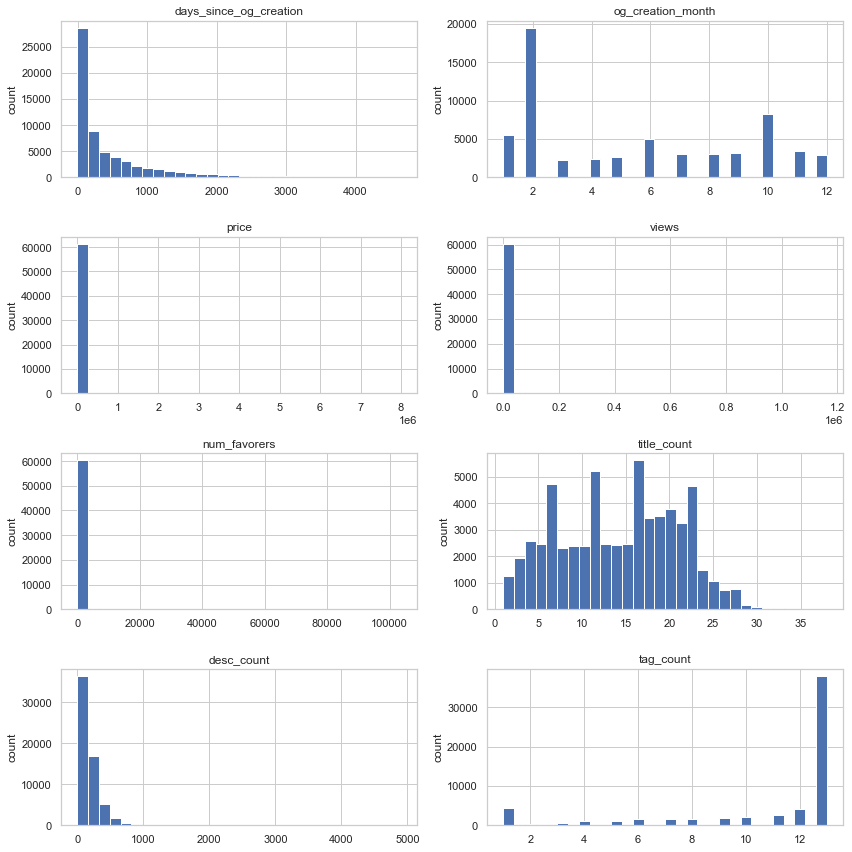

In [428]:
# plot initial histograms for each numerical column
    
def plothists(axes, num_cols):
    
    for ax, col in zip(axes.flatten(), num_cols):
        data.hist(col, ax = ax, bins = 30)
        ax.set_title(col)
        ax.set_ylabel('count')
#     ax.set_xscale('log')
#     ax.set_yscale('log')
        fig.tight_layout()
    
numerical_cols = ['days_since_og_creation','og_creation_month','price','views','num_favorers','title_count', 'desc_count', 'tag_count']
fig, axes = plt.subplots(4,2, figsize = (12,12))

plothists(axes, numerical_cols)

In [ ]:
# distributions of views and favorites are concentrated close to 0, meaning few posts get into the 
# higher end of either
# we can bucketize popularity using the median to account for heavy skew

### Defining Popularity ###

In [610]:
# earlier we could see heavy skew in the histograms for views and num_favorers
# we can address this by bucketizing popularity to see if there are differences in relationships
listings[['views','num_favorers']].describe()

,views,num_favorers
count,6.123100e+04,61231.000000
mean,3.505479e+03,269.414137
std,2.246896e+04,1656.192545
min,0.000000e+00,0.000000
25%,7.000000e+00,0.000000
50%,8.600000e+01,9.000000
75%,8.030000e+02,80.000000
max,1.162341e+06,103656.000000


In [611]:
listings[['views', 'num_favorers']].median()

views           86.0
num_favorers     9.0
dtype: float64

### Treating Outliers ###

In [612]:
# write a function for Interquartile Range method to split outliers into new dataframe

def getIQRdfs(df, col):
    '''returns list of regular df and outlier df'''
    
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3-Q1
    
    #print(Q1, Q3, IQR)
    
    lower_whisker = Q1-1.5*IQR
    upper_whisker = Q3+1.5*IQR

    #print(lower_whisker, upper_whisker)

    regular_df = df[df[col] < upper_whisker]
    outliers_df = df[df[col] > upper_whisker]
    #print('df names: regular_df, outliers_df')
    return [regular_df, outliers_df]

In [613]:
# dfs for views
regular_views = getIQRdfs(listings,'views')[0]
outlier_views = getIQRdfs(listings,'views')[1]

print('regular df: min views: {}    max views: {}'.format(min(regular_views.views), max(regular_views.views)))
print('outlier df: min views: {} max views: {}'.format(min(outlier_views.views), max(outlier_views.views)))

regular df: min views: 0.0    max views: 1996.0
outlier df: min views: 1998.0 max views: 1162341.0


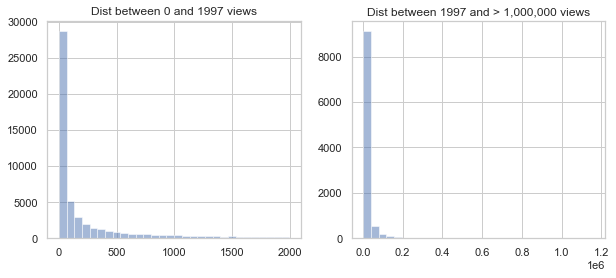

In [614]:
# distributions of 2 new dfs

fig, axes = plt.subplots(1,2, (figsize) = (10,4))

axes[0].hist(regular_views['views'], bins = 30, alpha=0.5)
axes[0].set_title('Dist between 0 and 1997 views')
axes[1].hist(outlier_views['views'], bins = 30, alpha=0.5)
axes[1].set_title('Dist between 1997 and > 1,000,000 views')

plt.show()

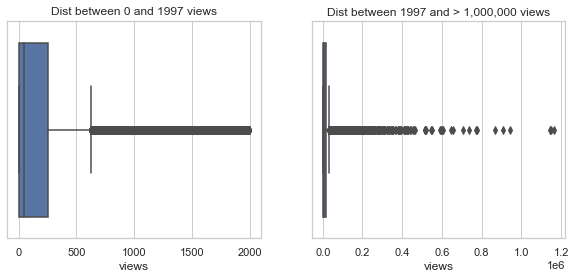

In [615]:
# seen another way

fig, axes = plt.subplots(1,2, (figsize) = (10,4))

sns.boxplot(data=regular_views, x = regular_views['views'], ax = axes[0])
axes[0].set_title('Dist between 0 and 1997 views')
sns.boxplot(data=outlier_views, x = outlier_views['views'], ax = axes[1])
axes[1].set_title('Dist between 1997 and > 1,000,000 views')

plt.show()

In [616]:
# dfs for faves
regular_faves = getIQRdfs(listings,'num_favorers')[0]
outlier_faves = getIQRdfs(listings,'num_favorers')[1]

print('regular df: rows: {}  min faves: {}    max faves: {}'.format(len(regular_faves), min(regular_faves.num_favorers), max(regular_faves.num_favorers)))
print('outlier df: rows: {}   min faves: {}  max faves: {}'.format(len(outlier_faves), min(outlier_faves.num_favorers), max(outlier_faves.num_favorers)))

regular df: rows: 51312  min faves: 0.0    max faves: 199.0
outlier df: rows: 9895   min faves: 201.0  max faves: 103656.0


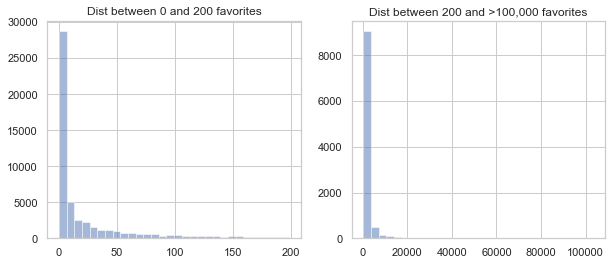

In [617]:
# dists of 2 new dfs

fig, axes = plt.subplots(1,2, (figsize) = (10,4))

axes[0].hist(regular_faves['num_favorers'], bins = 30, alpha=0.5)
axes[0].set_title('Dist between 0 and 200 favorites')
axes[1].hist(outlier_faves['num_favorers'], bins = 30, alpha=0.5)
axes[1].set_title('Dist between 200 and >100,000 favorites')

plt.show()

In [618]:
# we can still see a lot of skew, so let's use IQR again on the new outlier dfs to further divide popularity

In [619]:
smalloutlier_views = getIQRdfs(outlier_views,'views')[0]
bigoutlier_views = getIQRdfs(outlier_views,'views')[1]

print('small outlier df: rows: {}  min views: {}   max views: {}'.format(len(smalloutlier_views), min(smalloutlier_views.views), max(smalloutlier_views.views)))
print('big outlier df:   rows: {}  min views: {}  max views: {}'.format(len(bigoutlier_views), min(bigoutlier_views.views), max(bigoutlier_views.views)))

small outlier df: rows: 8910  min views: 1998.0   max views: 33894.0
big outlier df:   rows: 1227  min views: 33957.0  max views: 1162341.0


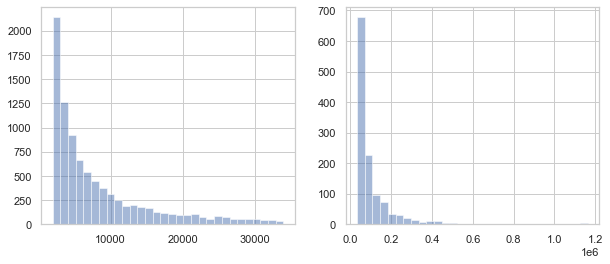

In [620]:
fig, axes = plt.subplots(1,2, (figsize) = (10,4))

axes[0].hist(smalloutlier_views['views'], bins = 30, alpha=0.5)
axes[1].hist(bigoutlier_views['views'], bins = 30, alpha=0.5)

plt.show()

In [621]:
# do same for faves

In [634]:
smalloutlier_faves = getIQRdfs(outlier_faves,'num_favorers')[0]
bigoutlier_faves = getIQRdfs(outlier_faves,'num_favorers')[1]

print('small outlier df: rows: {}  min faves: {}   max faves: {}'.format(len(smalloutlier_faves),min(smalloutlier_faves.num_favorers), max(smalloutlier_faves.num_favorers)))
print('big outlier df:   rows: {}  min faves: {}  max faves: {}'.format(len(bigoutlier_faves),min(bigoutlier_faves.num_favorers), max(bigoutlier_faves.num_favorers)))

small outlier df: rows: 8686  min faves: 201.0   max faves: 2616.0
big outlier df:   rows: 1209  min faves: 2621.0  max faves: 103656.0


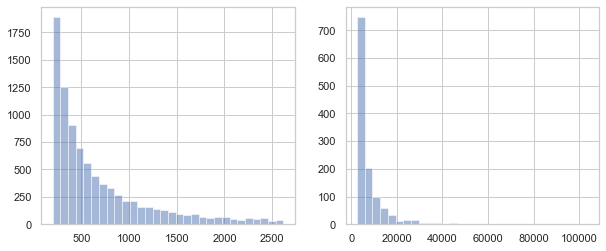

In [623]:
fig, axes = plt.subplots(1,2, (figsize) = (10,4))

axes[0].hist(smalloutlier_faves['num_favorers'], bins = 30, alpha=0.5)
axes[1].hist(bigoutlier_faves['num_favorers'], bins = 30, alpha=0.5)

plt.show()

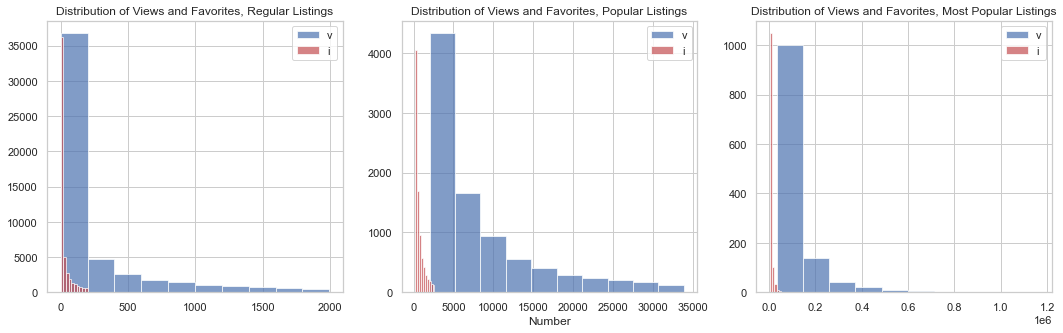

In [678]:
# plot all dists

fig, ax = plt.subplots(1,3, figsize = (18,5))

ax[0].hist(regular_views.views, alpha = 0.7, color = 'b')
ax[0].hist(regular_faves.num_favorers, alpha = 0.7, color = 'r')
ax[0].legend('views, favorites')
ax[0].set_title('Distribution of Views and Favorites, Regular Listings')

ax[1].hist(smalloutlier_views.views, alpha = 0.7)
ax[1].hist(smalloutlier_faves.num_favorers, alpha = 0.7, color = 'r')
ax[1].legend('views, favorites')
ax[1].set_title('Distribution of Views and Favorites, Popular Listings')
ax[1].set_xlabel('Total')

ax[2].hist(bigoutlier_views.views, alpha = 0.7)
ax[2].hist(bigoutlier_faves.num_favorers, alpha = 0.7, color = 'r')
ax[2].legend('views, favorites')
ax[2].set_title('Distribution of Views and Favorites, Most Popular Listings')

plt.savefig('hists.png', bbox_inches='tight')

In [679]:
# still skewed, but better than before

# now we have 3 dfs each for each bucket of popularity (regular, popular, most popular):
# views: regular_views, smalloutlier_views, bigoutlier_views
# faves: regular_faves, smalloutlier_faves, bigoutlier_faves

## Heatmaps ##

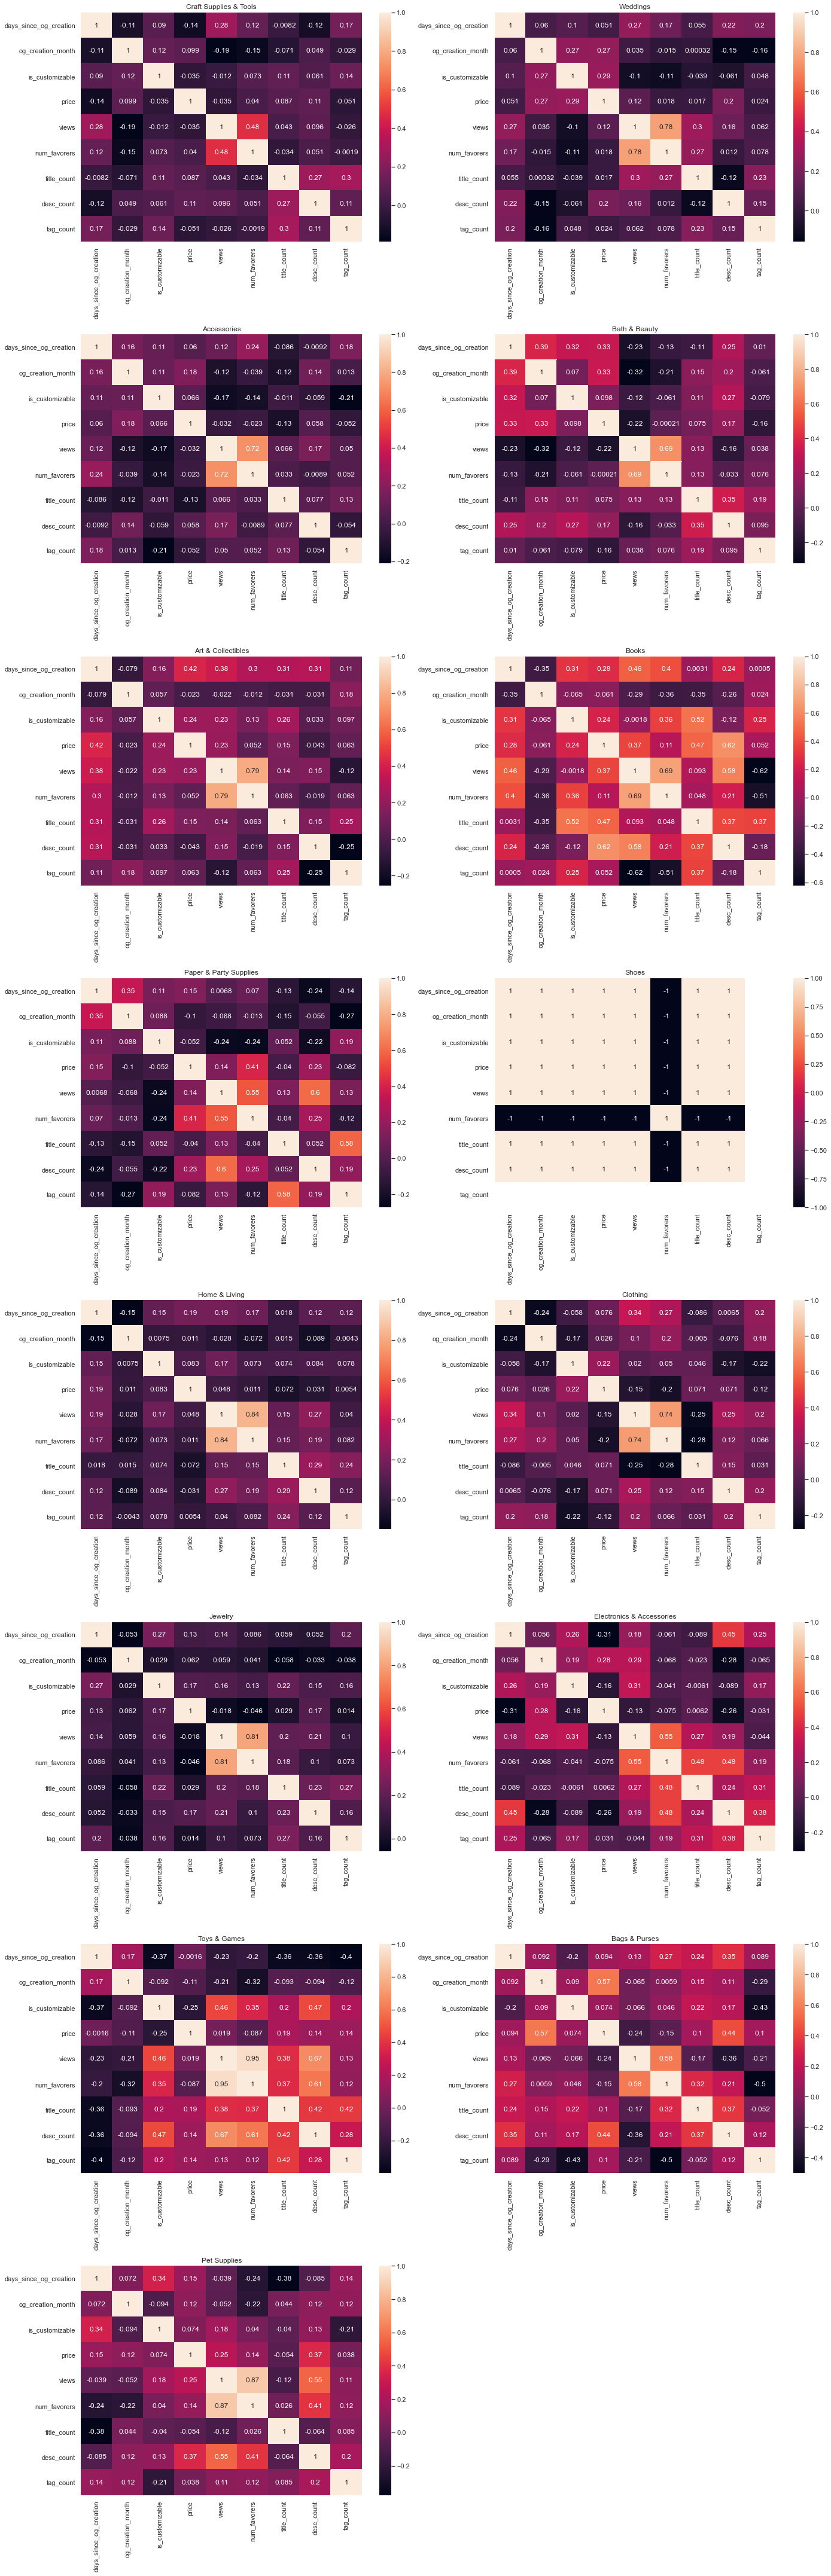

In [628]:
# look at relationships between columns
# regular favorites df

def plotheatmaps(df, axes, category):    
    for ax, cat in zip(axes.flatten(), categories):
        sns.heatmap(df[df['product_category'] == cat].corr(), annot = True, ax=ax)
        ax.set_title(cat)
        fig.tight_layout()

# edit this code for the df or columns of interest
categories = data['product_category'].unique()
cols = ['days_since_og_creation','og_creation_month','is_customizable','price','views','num_favorers','product_category', 'title_count', 'desc_count', 'tag_count']

fig, axes = plt.subplots(8,2, figsize = (20,60))

plotheatmaps(bigoutlier_faves[cols],axes,categories)
fig.delaxes(axes[7,1])


In [646]:
len(bigoutlier_faves[bigoutlier_faves.product_category == 'Toys & Games'])

27

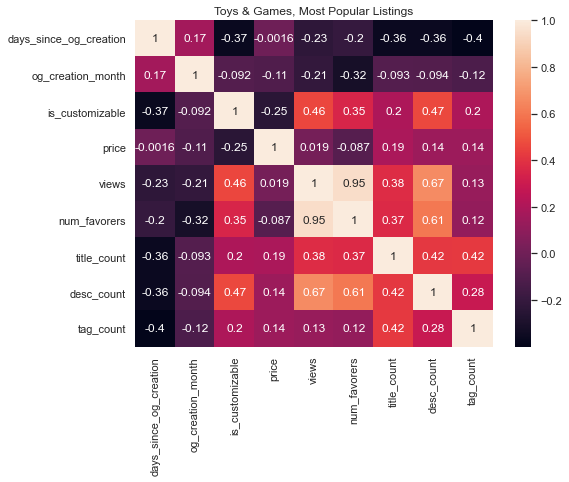

In [687]:
# get interesting single heatmaps

cols = ['days_since_og_creation','og_creation_month','is_customizable','price','views','num_favorers','product_category', 'title_count', 'desc_count', 'tag_count']

fig, ax = plt.subplots(figsize = (8,6))

ax = sns.heatmap(bigoutlier_faves[cols][bigoutlier_faves[cols]['product_category'] == 'Toys & Games'].corr(), annot = True)
ax.set_title('Toys & Games, Most Popular Listings')

plt.savefig('toysgames heatmap', bbox_inches='tight')

### Investigating Warm Spots on Heatmaps ## 

#### Description Length vs Favorites ####

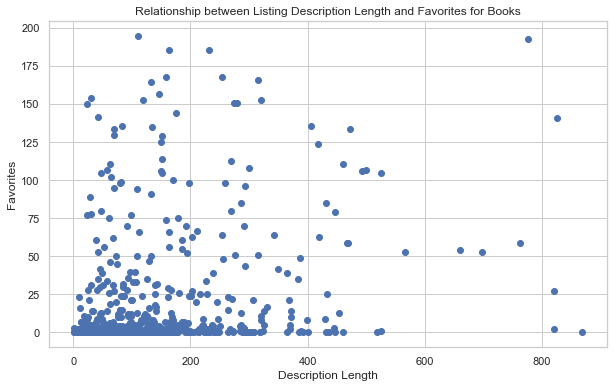

In [603]:
# regular_faves, Books, r = 0.3

x = regular_faves[regular_faves['product_category'] == 'Books'].desc_count
y = regular_faves[regular_faves['product_category'] == 'Books'].num_favorers

fig, ax = plt.subplots(figsize=(10,6))

ax.scatter(x, y)
ax.set_title('Relationship between Listing Description Length and Favorites for Books')
ax.set_xlabel('Description Length')
ax.set_ylabel('Favorites')
# ax.set_xscale('log')
# ax.set_yscale('log')

plt.show()

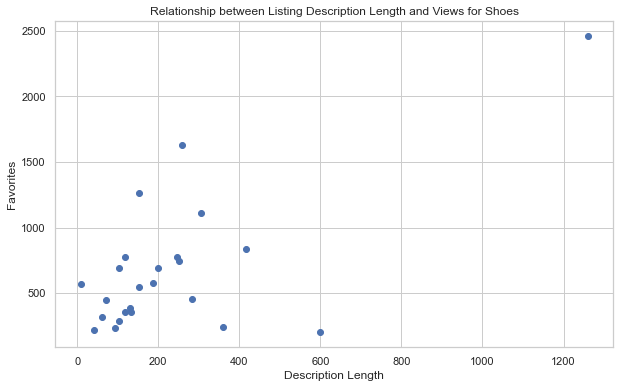

In [605]:
# smalloutlier_faves, Shoes, r = 0.67

x = smalloutlier_faves[smalloutlier_faves['product_category'] == 'Shoes'].desc_count
y = smalloutlier_faves[smalloutlier_faves['product_category'] == 'Shoes'].num_favorers

fig, ax = plt.subplots(figsize=(10,6))

ax.scatter(x, y)
ax.set_title('Relationship between Listing Description Length and Views for Shoes')
ax.set_xlabel('Description Length')
ax.set_ylabel('Favorites')
# ax.set_xscale('log')
# ax.set_yscale('log')

plt.show()

In [627]:
len(smalloutlier_faves[smalloutlier_faves.product_category == 'Shoes'])

24

In [630]:
# fairly small sample size

# Hypothesis Testing #

Null Hypothesis: <br/>
Alternative Hypothesis:

In [129]:
# take out rows where views = 0

nonzeroviews = listings[listings.views != 0]
nonzeroviews.head()

,listing_id,user_id,title,description,creation_tsz,original_creation_tsz,last_modified_tsz,price,tags,views,...,title_count,desc_count,tag_count,days_since_creation,days_since_og_creation,days_since_modified,col1,col2,col3,og_creation_month
1,844913736,343332809.0,Personalised 30th Birthday Non Shed Glitter Ca...,Personalised 30th Birthday Non Shed Glitter Ca...,1.614075e+09,1.598100e+09,1.614075e+09,4.0,"['gold glitter', 'birthday topper', 'glitter t...",2326.0,...,20,185,11,1,186,1,2021-02-23 02:10:57,2020-08-22 05:33:47,2021-02-23 02:10:57,8
2,575201380,124528788.0,Personalised Wedding Day Slippers for Bridesma...,Beautiful personalised wedding slippers perfec...,1.614075e+09,1.516874e+09,1.614075e+09,3.0,"['Hen Party', 'bridesmaid gifts', 'hen party s...",62398.0,...,12,268,13,1,1126,1,2021-02-23 02:10:56,2018-01-25 01:59:36,2021-02-23 02:10:56,1
6,777598898,282025061.0,Todoroki Keychains,Custom made keychains of Todoroki from My Hero...,1.614075e+09,1.585753e+09,1.614075e+09,7.5,"['Todoroki', 'mha', 'my hero academia', 'japan...",1195.0,...,2,10,12,1,329,1,2021-02-23 02:10:52,2020-04-01 07:55:44,2021-02-23 02:10:52,4
7,935930570,294215523.0,Kids Melon Cartoon Face Mask,Kids melon cartoon mask\n\nGentle wash in cold...,1.614075e+09,1.611637e+09,1.614075e+09,5.5,"['Face mask', 'Kids face mask', 'Coco', 'Melon']",455.0,...,5,16,4,1,30,1,2021-02-23 02:10:51,2021-01-25 20:51:44,2021-02-23 02:10:51,1
14,906615751,389615856.0,Bookish Character University Style Sweatshirt,Sarah J Maas inspired- University Style Charac...,1.614075e+09,1.605652e+09,1.614075e+09,50.0,"['sjm', 'acotar', 'crescent city', 'book shirt...",567.0,...,5,29,9,1,99,1,2021-02-23 02:10:44,2020-11-17 14:32:49,2021-02-23 02:10:44,11


In [ ]:
# assumptions
1. IID
2. Equal variance
alpha = 0.05
# Bonferroni correction - only if performing on same sample

In [103]:
# sample 
# null should be no difference, alternative is difference
# equal variance = false

listings['og_creation_month'] = 2

In [150]:
# 
df1 = listings[listings['og_creation_month'] == 2]
df2 = listings[listings['og_creation_month'] != 2]
df3 = listings[listings['og_creation_month'] == 10]

In [171]:
df1.views.mean(), df2.views.mean()

(789.1981277646332, 4769.2068247624975)

In [172]:
df1.num_favorers.mean(), df2.num_favorers.mean()

(66.95082810410452, 363.60858120558044)

In [575]:
# histograms of title, description, and tags length
# view_dfs = [regular_views, smalloutlier_views, bigoutlier_views]

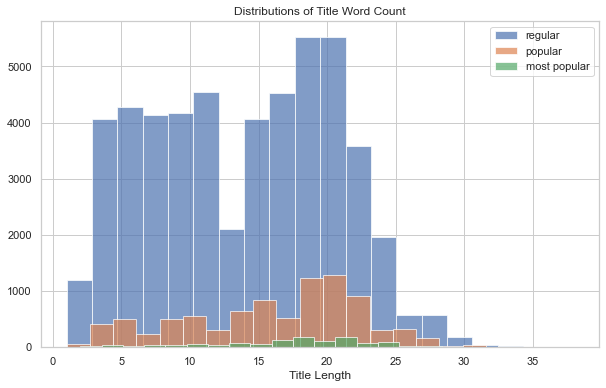

In [688]:
fig, ax = plt.subplots(figsize = (10,6))

for df in view_dfs:
    ax.hist(df.title_count, alpha = 0.7, bins = 20)
    ax.set_title('Distributions of Title Word Count')
    ax.set_xlabel('Title Length')
    ax.legend(['regular','popular','most popular'])
    
plt.savefig('dist of title counts', bbox_inches='tight')

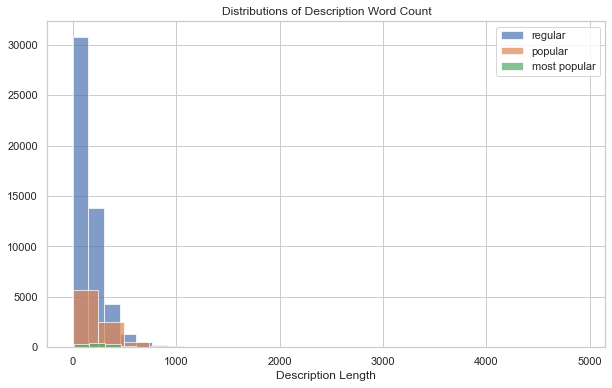

In [571]:
fig, ax = plt.subplots(figsize = (10,6))

for df in view_dfs:
    ax.hist(df.desc_count, alpha = 0.7, bins = 20)
    ax.set_title('Distributions of Description Word Count')
    ax.set_xlabel('Description Length')
    ax.legend(['regular','popular','most popular'])

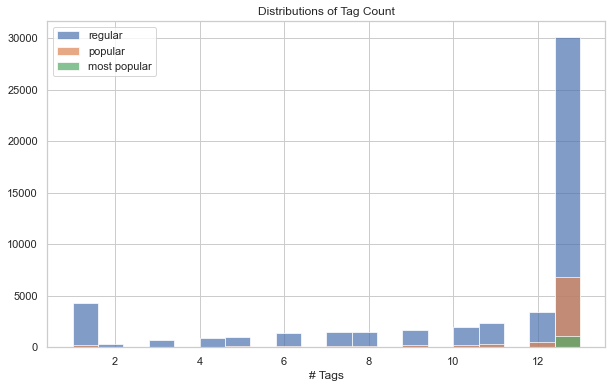

In [574]:
fig, ax = plt.subplots(figsize = (10,6))

for df in view_dfs:
    ax.hist(df.tag_count, alpha = 0.7, bins = 20)
    ax.set_title('Distributions of Tag Count')
    ax.set_xlabel('# Tags')
    ax.legend(['regular','popular','most popular'])

In [521]:
# test for what stood out - calculate averages for different groups

# groups: feb vs not feb
# most popular average description length

# redo test for df removing outliers
# look at means for each df

(12.52241238793806, 11.895735129068463, 10.562967312585632)

In [497]:
# popularity dfs
view_dfs = [regular_views, smalloutlier_views, bigoutlier_views]
fave_dfs = [regular_faves, smalloutlier_faves, bigoutlier_faves]

## Hypothesis 1: Creating a listing in February does not lead to more views/favorites vs. creating in other months ##

In [505]:
## Hypothesis 1 dfs (views)

# regular views df
views_feb = regular_views[regular_views['og_creation_month'] == 2]
views_notfeb = regular_views[regular_views['og_creation_month'] != 2]

# popular views df
views2_feb = smalloutlier_views[smalloutlier_views['og_creation_month'] == 2]
views2_notfeb = smalloutlier_views[smalloutlier_views['og_creation_month'] != 2]

# most popular views df
views3_feb = bigoutlier_views[bigoutlier_views['og_creation_month'] == 2]
views3_notfeb = bigoutlier_views[bigoutlier_views['og_creation_month'] != 2]

feb_views_dfs = [views_feb, views2_feb, views3_feb]
notfeb_views_dfs = [views_notfeb, views2_notfeb, views3_notfeb]

In [507]:
# conduct t-tests

for df1, df2 in zip(feb_views_dfs, notfeb_views_dfs):
    stat, p_val = stats.ttest_ind(df1.views, df2.views, equal_var=False)
    print('The statistic is: {} \nP-value: {}'.format(stat ,p_val))

The statistic is: -88.84859541181824 
P-value: 0.0
The statistic is: 0.49788394445596923 
P-value: 0.6187134094772485
The statistic is: 0.33937862214048253 
P-value: 0.7351364130581419


In [510]:
## Hypothesis 1 dfs (faves)

# regular faves df
faves_feb = regular_faves[regular_faves['og_creation_month'] == 2]
faves_notfeb = regular_faves[regular_faves['og_creation_month'] != 2]

# popular views df
faves2_feb = smalloutlier_faves[smalloutlier_faves['og_creation_month'] == 2]
faves2_notfeb = smalloutlier_faves[smalloutlier_faves['og_creation_month'] != 2]

# most popular views df
faves3_feb = bigoutlier_faves[bigoutlier_faves['og_creation_month'] == 2]
faves3_notfeb = bigoutlier_faves[bigoutlier_faves['og_creation_month'] != 2]

feb_faves_dfs = [faves_feb, faves2_feb, faves3_feb]
notfeb_faves_dfs = [faves_notfeb, faves2_notfeb, faves3_notfeb]

In [511]:
# conduct t-tests

for df1, df2 in zip(feb_faves_dfs, notfeb_faves_dfs):
    stat, p_val = stats.ttest_ind(df1.views, df2.views, equal_var=False)
    print('The statistic is: {} \nP-value: {}'.format(stat ,p_val))

The statistic is: -36.75083677374808 
P-value: 1.0192739904978294e-291
The statistic is: -1.9253131041989844 
P-value: 0.05451683392709268
The statistic is: -0.07444271960549967 
P-value: 0.9408129451401286


## Hypothesis 2: The most popular listings do not have longer titles than regular listings ##

In [689]:
bigoutlier_views.title_count.mean(), smalloutlier_views.title_count.mean(), regular_views.title_count.mean()


(17.52078239608802, 15.984399551066218, 13.814249363867685)

In [ ]:
## 

In [492]:
## two sample t-test with unequal variances, views, outliers removed

stat, p_val = stats.ttest_ind(views2_feb.views, views2_notfeb.views, equal_var=False)

print('The statistic is: {} \nP-value: {}'.format(stat ,p_val))

The statistic is: 0.49788394445596923 
P-value: 0.6187134094772485


In [157]:
## two sample t-test with unequal variances, views

stat, p_val = stats.ttest_ind(df1.views, df2.views, equal_var=False)

print('The statistic is: {} \nP-value: {}'.format(stat ,p_val))

The statistic is: -26.682526736005265 
P-value: 6.027330178620282e-156


In [158]:
## two sample t-test with unequal variances, favorites

stat, p_val = stats.ttest_ind(df1.num_favorers, df2.num_favorers, equal_var=False)

print('The statistic is: {} \nP-value: {}'.format(stat ,p_val))

The statistic is: -25.58873356852779 
P-value: 1.1894735212608477e-143


In [160]:
# ## two sample Mann-Whitney test

# stat, p_val = stats.mannwhitneyu(df1.num_favorers, df2.num_favorers, alternative="greater")

# print('The statistic is: {} \nP-value: {}'.format(stat ,p_val))

In [144]:
## two sample t-test with unequal variances, non-zero views, views

stat, p_val = stats.ttest_ind(nonzerofeb.views, nonzeronotfeb.views, equal_var=False)

print('The statistic is: {} \nP-value: {}'.format(stat ,p_val))

The statistic is: -12.154089107773688 
P-value: 7.75935111062704e-34


In [147]:
## two sample t-test with unequal variances, non-zero views, favorites

stat, p_val = stats.ttest_ind(nonzerofeb.num_favorers, nonzeronotfeb.num_favorers, equal_var=False)

print('The statistic is: {} \nP-value: {}'.format(stat ,p_val))

The statistic is: -9.933036418440489 
P-value: 3.6445373100414066e-23


In [159]:
# ## two sample Mann-Whitney test

# stat, p_val = stats.mannwhitneyu(nonzerofeb.views, nonzeronotfeb.views, alternative="greater")

# print('The statistic is: {} \nP-value: {}'.format(stat ,p_val))

## Hypothesis 3: Jewelry listings have the same proportion of popular listings compared to Home & Living ##

In [698]:
#teststat = len(bigoutlier_faves[bigoutlier_faves.product_category == 'Craft Supplies & Tools'])

print(len(regular_faves[regular_faves.product_category == 'Jewelry'])) #5764
print(len(smalloutlier_faves[smalloutlier_faves.product_category == 'Jewelry'])) #1103
print(len(bigoutlier_faves[bigoutlier_faves.product_category == 'Jewelry'])) #313

#7180 total
#proportion: 313/5764 = 0.0543

print(len(regular_faves[regular_faves.product_category == 'Home & Living'])) #9943
print(len(smalloutlier_faves[smalloutlier_faves.product_category == 'Home & Living'])) #1487
print(len(bigoutlier_faves[bigoutlier_faves.product_category == 'Home & Living'])) #246

#11676 total
#proportion: 246/11676 = 0.0211

5764
1103
313
9943
1487
246


In [ ]:
stat, p_val = stats.chisquare(obs.ravel(), f_exp=ex.ravel(),
                             ddof=obs.size - 1 - dof)

print('The statistic is: {} \nP-value: {}'.format(stat ,p_val))

# chi2_contingency
# mann-whitney

# draw contigency table for popularity levels